In [81]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.interactive(False)
import seaborn as sns
import os
sns.set()

In [82]:
obe = pd.read_csv("obesity.csv",index_col=0, encoding="utf-8")
edu = pd.read_csv("education.csv",index_col=0, encoding="utf-8")
gdp = pd.read_csv("calories x gdp.csv",index_col=0, encoding="utf-8")
cfp = pd.read_csv("supply.csv",index_col=0, encoding="utf-8")
happy = pd.read_csv("happiness.csv",index_col=0, encoding="utf-8")

In [83]:
obe = obe.reset_index().set_index(["country","year"])
edu = edu.reset_index().set_index(["country","year"])
gdp = gdp.reset_index().set_index(["country","year"])
cfp = cfp.reset_index().set_index(["country","year"])
happy = happy.reset_index().set_index(["country","year"])

In [84]:
alldata = obe.merge(edu,left_index=True,right_index=True)
alldata = alldata.merge(gdp,left_index=True,right_index=True)
alldata = alldata.merge(cfp,left_index=True,right_index=True)
alldata = alldata.merge(happy,how="outer",left_index=True,right_index=True)

In [85]:
alldata = alldata.reset_index()

In [86]:
alldata.head()

,country,year,under,healthy,over,school,gdp,calsupply,pop,animal,plant,fat,carb,happy
0,Afghanistan,1975,29.85,63.05,7.10,21.0,NaN,2752.0,13505544.0,57.04,254.12,359.55,2081.29,NaN
1,Afghanistan,1980,29.00,63.25,7.75,29.0,NaN,2478.0,14185729.0,60.36,222.32,360.45,1834.87,NaN
2,Afghanistan,1985,27.80,63.45,8.75,15.0,NaN,2403.0,12625292.0,59.76,208.52,412.83,1721.89,NaN
3,Afghanistan,1990,26.50,63.50,10.00,19.4,NaN,2314.0,13032161.0,67.80,197.08,435.60,1613.52,NaN
4,Afghanistan,1995,25.45,64.00,10.65,46.1,NaN,1844.0,19789880.0,60.64,151.20,365.94,1266.22,NaN


In [87]:
alldata.describe()

,year,under,healthy,over,school,gdp,calsupply,pop,animal,plant,fat,carb,happy
count,2287.000000,832.000000,832.000000,832.000000,832.000000,802.000000,832.000000,8.240000e+02,832.000000,832.000000,832.000000,832.000000,1562.000000
mean,2004.973328,8.160877,56.501142,35.339904,86.320913,11995.363705,2709.177885,4.654801e+07,131.835865,168.730288,712.220409,1696.391322,5.433676
std,11.941776,7.259145,10.312733,16.141915,18.903837,12960.976391,513.609843,1.487814e+08,86.778514,38.406866,344.959573,228.730906,1.121017
min,1975.000000,0.750000,26.700000,5.300000,15.000000,148.026810,1479.000000,1.335620e+05,13.200000,94.200000,120.420000,1054.370000,2.661718
25%,2000.000000,2.350000,48.200000,19.650000,81.000000,2409.923035,2275.750000,4.447926e+06,58.550000,142.430000,422.932500,1544.945000,4.606351
50%,2010.000000,5.400000,56.725000,38.200000,95.000000,6794.860352,2691.000000,1.050684e+07,105.880000,160.940000,623.250000,1692.325000,5.332600
75%,2013.000000,12.500000,65.012500,48.862500,100.000000,18587.466307,3129.000000,3.203441e+07,209.500000,189.100000,1009.800000,1822.955000,6.271025
max,2017.000000,36.900000,79.350000,72.100000,100.000000,84125.843750,3828.000000,1.341335e+09,405.920000,330.360000,1532.520000,2534.190000,8.018934


In [88]:
alldata.tail()

,country,year,under,healthy,over,school,gdp,calsupply,pop,animal,plant,fat,carb,happy
2282,Zimbabwe,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.690188
2283,Zimbabwe,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.184451
2284,Zimbabwe,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.703191
2285,Zimbabwe,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.735400
2286,Zimbabwe,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.638300


In [89]:
Y2010 = alldata[alldata["year"] == 2010]

In [90]:
Y2010.head()

,country,year,under,healthy,over,school,gdp,calsupply,pop,animal,plant,fat,carb,happy
9,Afghanistan,2010,21.60,63.70,14.65,83.2,NaN,2104.0,31411743.0,48.44,184.12,304.92,1566.52,4.758381
26,Albania,2010,1.85,48.65,49.50,98.5,8978.370117,3076.0,3204284.0,225.24,201.56,918.63,1730.57,5.268937
41,Algeria,2010,4.90,41.35,53.75,100.0,12449.701170,3142.0,35468208.0,90.16,253.60,622.26,2175.98,5.463567
62,Argentina,2010,0.95,38.35,60.65,100.0,18501.466800,3155.0,40412376.0,255.80,141.44,1013.40,1744.36,6.441067
74,Armenia,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.367811


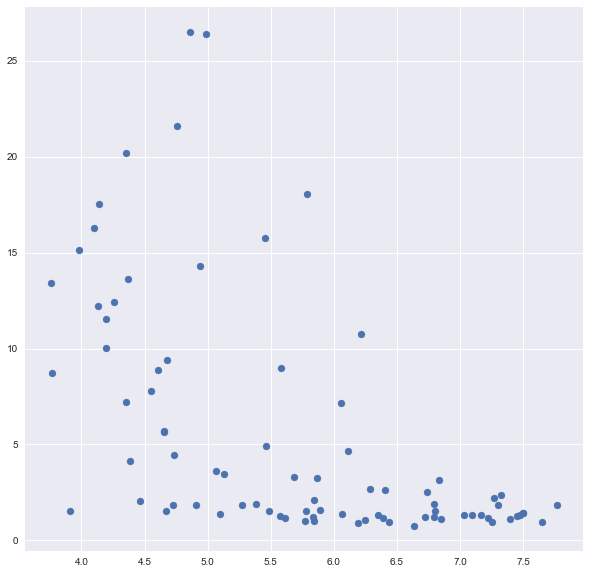

In [114]:
plt.figure(figsize=(10, 10))
plt.scatter(Y2010["happy"],Y2010["under"])
plt.show()

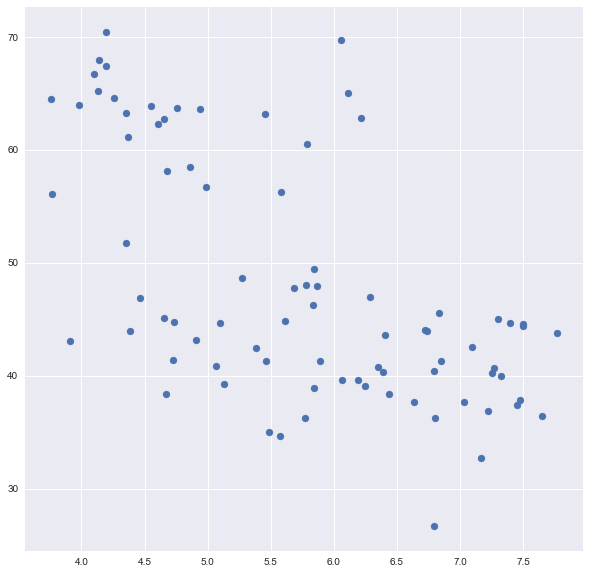

In [118]:
plt.figure(figsize=(10, 10))
plt.scatter(Y2010["happy"],Y2010["healthy"])
plt.show()

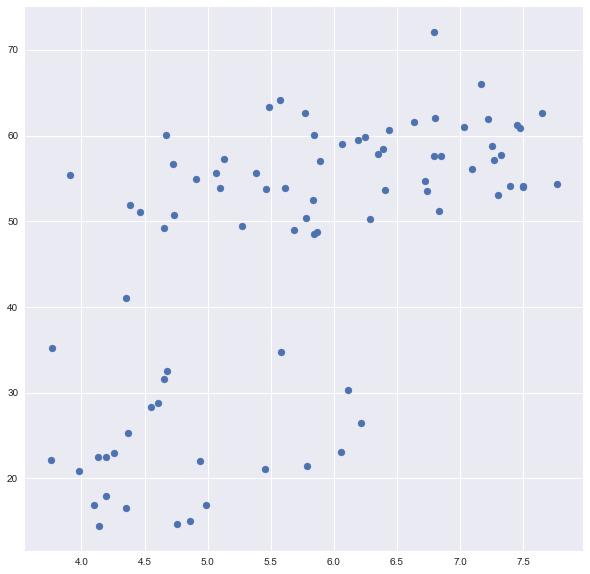

In [119]:
plt.figure(figsize=(10, 10))
plt.scatter(Y2010["happy"],Y2010["over"])
plt.show()

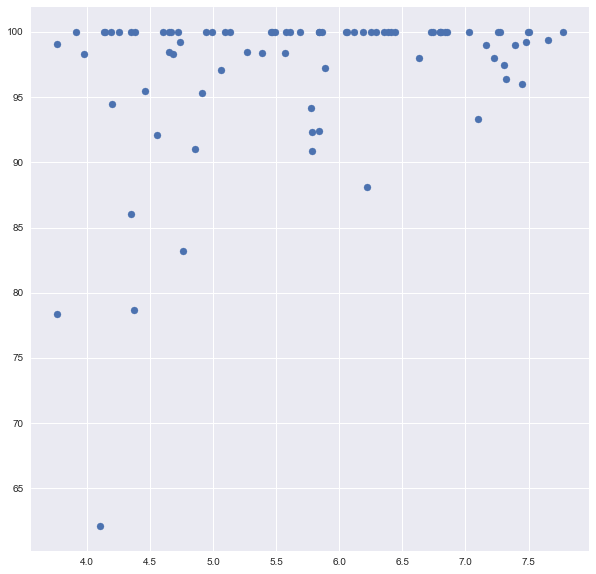

In [120]:
plt.figure(figsize=(10, 10))
plt.scatter(Y2010["happy"],Y2010["school"])
plt.show()

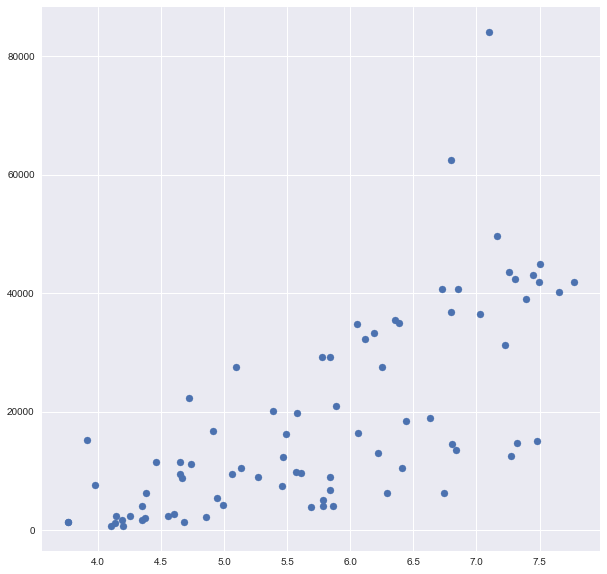

In [121]:
plt.figure(figsize=(10, 10))
plt.scatter(Y2010["happy"],Y2010["gdp"])
plt.show()

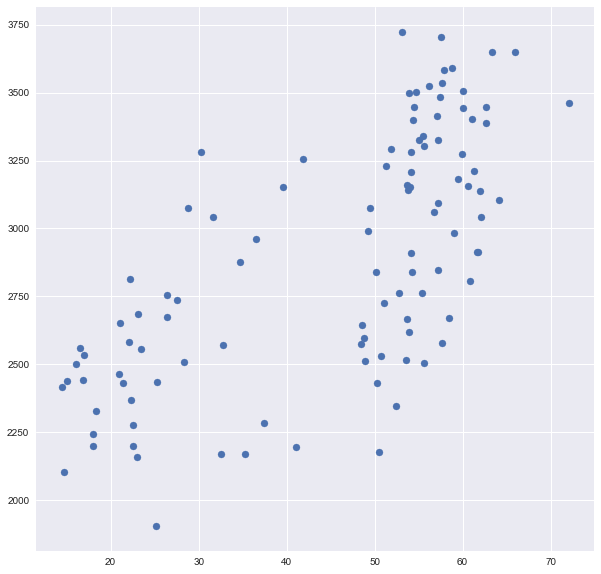

In [123]:
plt.figure(figsize=(10, 10))
plt.scatter(Y2010["over"],Y2010["calsupply"])
plt.show()